In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import itertools as it
import numpy as np
import matplotlib.pyplot as plt
import quandl as qd
import pandas as pd
import random as rm
import datetime as dt
from scipy.spatial.distance import pdist,cdist,squareform
from sklearn.model_selection import KFold
import cvxpy as cvx

import helper as he
from cd.model import utility as ut

In [3]:
import matplotlib as mpl
from matplotlib import rc
# rc('text',usetex=True)
rc('font',**{'family':'serif','serif':['Times New Roman'],'size':9})
rc('mathtext',fontset='cm')
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
%config InlineBackend.rc = {'figure.figsize': (5,3.5)}
import matplotlib.gridspec as gridspec

In [8]:
? pd.read_csv

In [66]:
t = pd.read_csv('~/Downloads/data_secteur.csv',delimiter=';',header=None,decimal=',',parse_dates=[0])

In [67]:
t.columns = ['date','sector','metric_label','metric_value']

In [94]:
metrics = ['enterprise_value_ebitda','return_asset','market_cap','return_asset','return_equity','price_earning']#,'ReturnOnAsset1YForwardIbes','ReturnOnEquity1YForwardIbes']
u = t[t.metric_label.isin(metrics)]
#u = t

In [95]:
v = u.pivot_table(index=['date'],columns=['sector','metric_label'],values='metric_value',aggfunc=np.max)

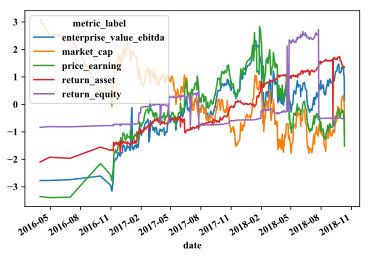

In [96]:
gics = 20
((v[gics] - v[gics].mean())/v[gics].std()).plot()

In [99]:
qd.ApiConfig.api_key = 'TFPsUSNkbZiK8TgJJ_qa'

vix = qd.get('CBOE/VIX')[['VIX Close']]
vix = vix.rename(columns={'VIX Close':'vix'})

#nas = qd.get('NASDAQOMX/COMP')[['Index Value']]
#nas = nas.rename(columns={'Index Value':'nas'})

#amz = qd.get_table('WIKI/PRICES', ticker = 'AMZN')[['date','close']].set_index('date')
#amz = amz.rename(columns={'close':'amz'})

In [114]:
energy = pd.read_csv('~/Downloads/IXC.csv',parse_dates=[0]).set_index('Date')[['Adj Close','Volume']]

In [116]:
energy.index.name = 'date'
energy = energy.rename(columns={'Adj Close':'p','Volume':'v'})

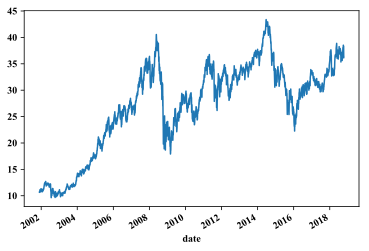

In [119]:
energy.p.plot()

In [121]:
financials = pd.read_csv('~/Downloads/IYF.csv',parse_dates=[0]).set_index('Date')[['Adj Close','Volume']]

In [122]:
financials.index.name = 'date'
financials = energy.rename(columns={'Adj Close':'p','Volume':'v'})

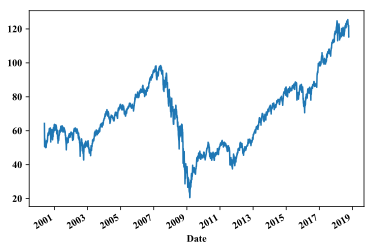

In [123]:
financials.p.plot()